### 分類とは
分類とは、データのクラスを予測して分けるタスクの事  
  
あるユーザー郡のデータを基に、「退会しそう」「退会しなさそう」というグループに分けるような処理を分類という  
こういった、タスクは**教師あり学習の典型**である  
  
分類を行うアルゴリズムとしては以下の3つが良く知られている  
* サポートベクターマシン
* 決定木
* ランダムフォレスト

### 分類モデル構築の流れ
分類モデルを構築する前にデータを用意する  
  
先ず、データセットを**学習用**と**テスト用**に分割する  
分類モデルの構築は、学習用データセットを用いて行い、(学習と呼ばれるステップ)  
その精度はテスト用データセットを用いて評価する(精度の事を汎化能力とも呼ぶ)  
  
また、データセットを学習用とテスト用に分け、学習、評価を行い  
また、データを分け...  
と繰り返す(同じデータに対してばかり学習するのを防ぐ効果がある)方法を**交差検証**という  
  
学習ステップはscikit-learnのfit  
予測ステップはscikit-learnのpredictを用いる

In [3]:
from sklearn.datasets import load_iris

# scikit-learnで用意されているデータセット
iris = load_iris()

iris_data = iris.data
species_data = iris.target

print(f"iris_data:\n{iris_data[:5]}\n")
print(f"species_data:\n{species_data[:5]}\n")

iris_data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

species_data:
[0 0 0 0 0]



scikit-learnではあらかじめデータセットが用意されている  
irisとはアヤメの事で、150枚のアヤメの画像が用意されている  
  
1つのアヤメに対して、4つの情報が用意されている  
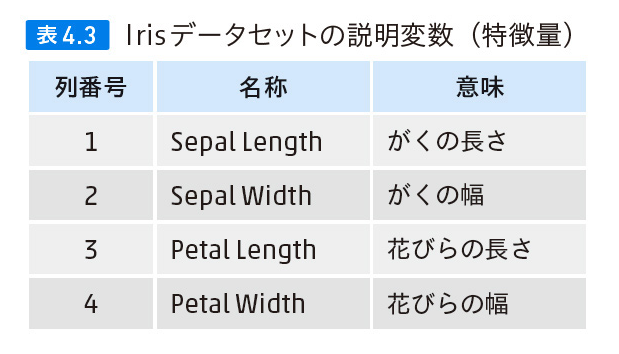  
  
targetはアヤメを分類する  
`trainig_data[1]`に対して、そのアヤメの種類のダミー変数が`target_data[1]`に入るというイメージ  
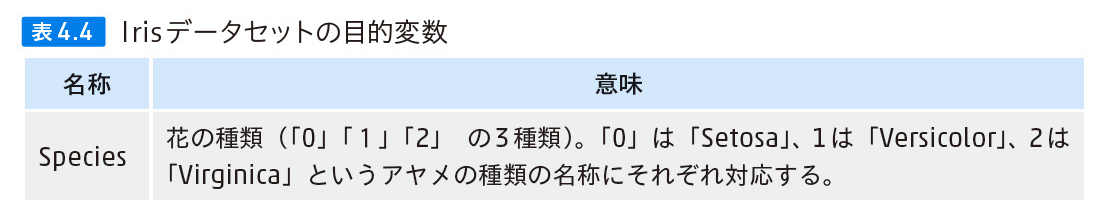

それぞれのデータを学習用、評価用に分割する  

In [6]:
from sklearn.model_selection import train_test_split

# テストサイズを全体の3割として、乱数シード123で分割(通常乱数シードは指定しない)
iris_train,iris_test,specie_train,specie_test = train_test_split(iris_data,species_data,
                                                                 test_size=0.3,random_state=123)

print(iris_train.shape)
print(iris_test.shape)
print(specie_train.shape)
print(specie_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### サポートベクタマシン
サポートベクタマシン(support vector machine , SVM)は分類、回帰だけでなく、外れ値検出にも使えるアルゴリズム  
  
直線や平面で分離できないデータ群を、より高次元の空間に移して線形分離をして、分類を行うアルゴリズム  
高次元の空間に移すというのは、厳密にはデータ間の近さを定量化するカーネルというものを用いている  
  
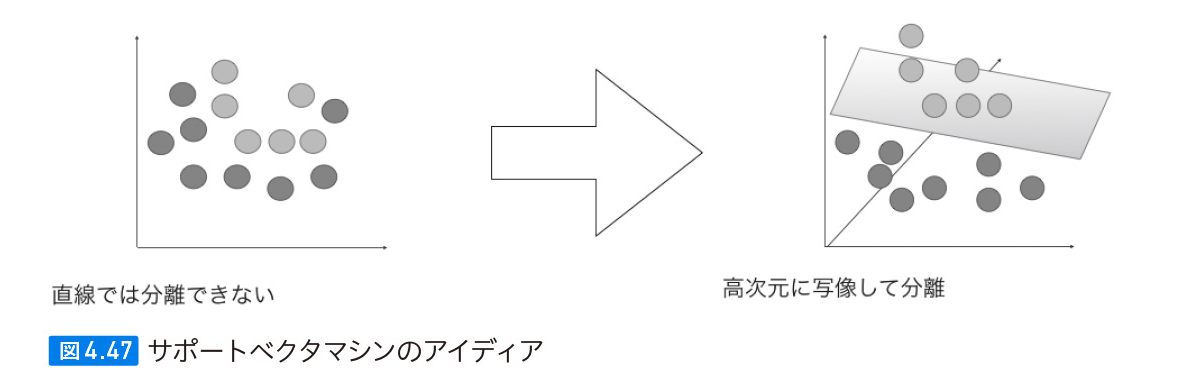  
  
例えば、以下の場合は分類が用意(線形分離可能)である  
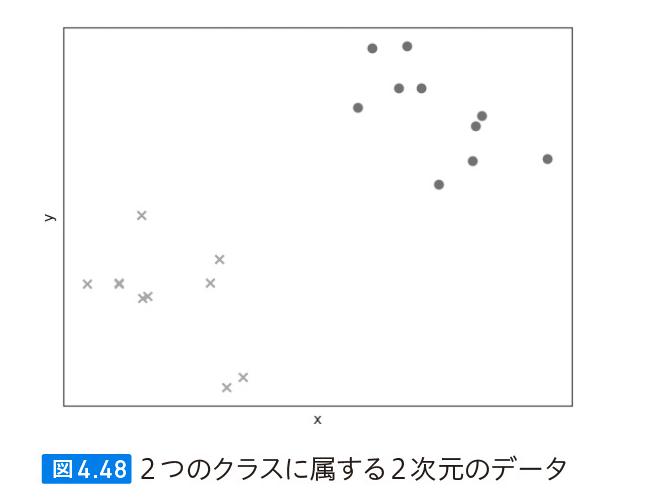  
  
この場合の分離方法はいくつか考案できる  
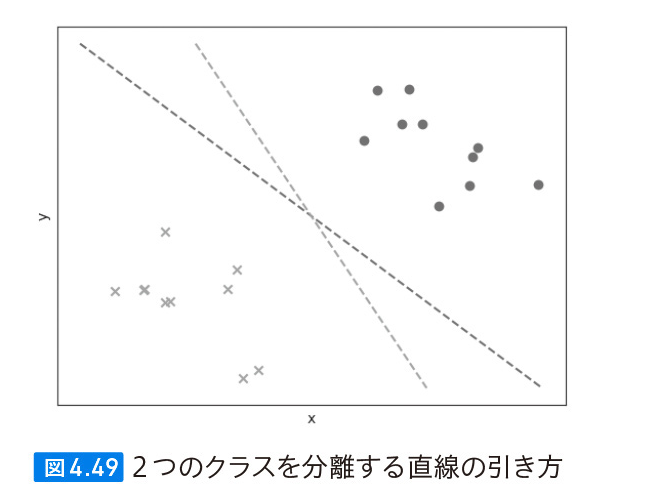  
  
サポートベクタマシンは、ひいた直線と、それに最も近い各クラス間のデータの距離が最も遠くなるように直線を引いていく  
  
この、分類に用いる直線を**決定境界**  
各クラスのうち、直線に最も近いデータを**サポートベクタ**  
クラス間のサポートベクタの距離を**マージン**という  
  
サポートベクタマシンは、マージンを最大にする決定境界を見つけるアルゴリズムである  
最大にする理由は、未知データに対応する能力(汎化能力)を高めるため  
  
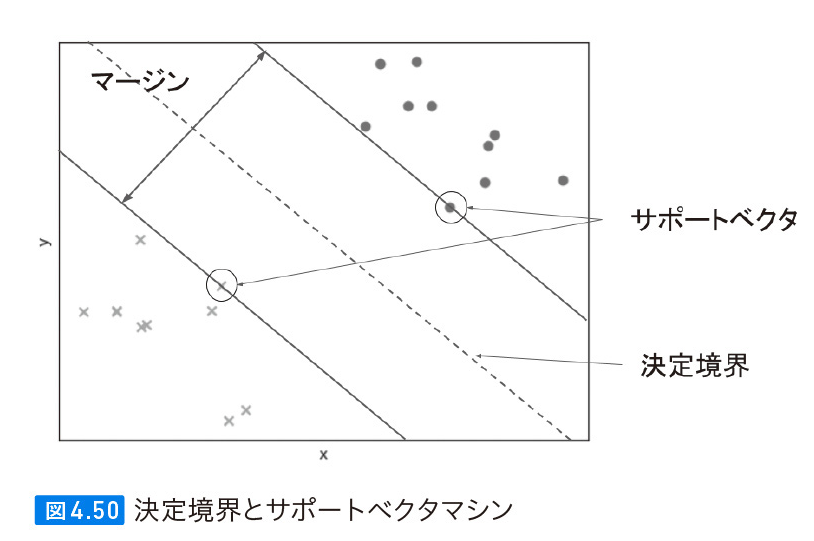  
  
ここで、サポートベクタマシンをscikit-learnを用いて理解する  
  
* クラス0 X-Yともに0～1に分布する一様乱数(100個)
* クラス1 X-Yともに-1～0に分布する一様乱数(100個)
  
これで分類させてみる

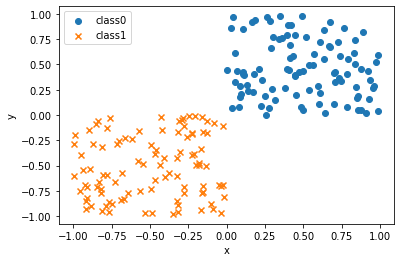

In [7]:
import numpy
import matplotlib.pyplot as pyplot

# クラス0を作成
# 0~1までのデータを100点。x-y欲しいので2列分
# ラベルは100個のデータそれぞれを識別するために生成する
# クラス0の場合ラベルは全て0
class_0 = numpy.random.uniform(0,1,size=(100,2))
label_0 = numpy.repeat(0,100)

# クラス1を生成
class_1 = numpy.random.uniform(-1,0,size=(100,2))
label_1 = numpy.repeat(1,100)

canvas,sub_plots = pyplot.subplots()

sub_plots.scatter(class_0[:,0],class_0[:,1],marker="o",label="class0")
sub_plots.scatter(class_1[:,0],class_1[:,1],marker="x",label="class1")

sub_plots.set_xlabel("x")
sub_plots.set_ylabel("y")

sub_plots.legend()
pyplot.show()

上記データを基にサポートベクタマシンによる分類を行う

In [17]:
from sklearn.svm import SVC

def visualization_svm(class_0,label_0,
                       class_1,label_1,
                       kernel,C,
                       class_max=1,class_min=-1,
                       label_max=1,label_min=-1):
    # SVCの学習ステップ
    svc = SVC(kernel=kernel,C=C)
    svc.fit(numpy.vstack((class_0,class_1)),
            numpy.hstack((label_0,label_1)))
    
    # SVCの可視化ステップ
    canvas,sub_plots = pyplot.subplots()
    
    # 学習データのプロット
    sub_plots.scatter(class_0[:,0],class_0[:,1],marker="o",label="class0")
    sub_plots.scatter(class_1[:,0],class_1[:,1],marker="x",label="class1")
    
    # 決定境界とマージンをプロット
    xx,yy = numpy.meshgrid(numpy.linspace(class_min,class_max,100),
                           numpy.linspace(label_min,label_max,100))
    xy = numpy.vstack([xx.ravel(),yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100,100))
    sub_plots.contour(xx,yy,p,
                      colors="k",levels=[-1,0,1],
                      alpha=0.5,linestyles=["--","-","--"])
    
    # サポートベクタをプロット
    sub_plots.scatter(svc.support_vectors_[:,0],
                      svc.support_vectors_[:,1],
                      s=250,facecolors="none",edgecolors="black")
    
    sub_plots.set_xlabel("x")
    sub_plots.set_ylabel("y")

    sub_plots.legend(loc="best")
    pyplot.show()

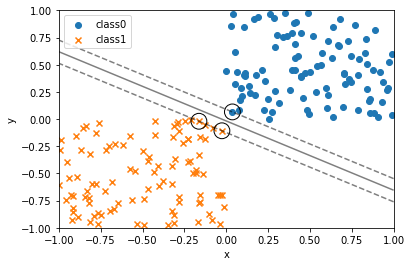

In [18]:
visualization_svm(class_0,label_0,
                  class_1,label_1,
                  kernel="linear",C=1e6)

Cの値を1e6とすると、マージンが変更される  
**Cの値を大きくすればマージンは小さくなる**
  
実践部分が決定境界で、それ未満はClass1  
それ以上はClass0で分類される

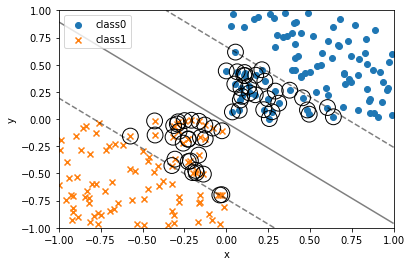

In [19]:
visualization_svm(class_0,label_0,
                  class_1,label_1,
                  kernel="linear",C=0.1)

マージンを広く取ったため、サポートベクタがその分増えた  
つまり、このマージンだと分類がやや難しくなったという事  
  
次に線形分離出来ないものを考えてみる